In [ ]:
nr=1
label=list_models[nr].labels_

df=list_df[nr]
#subfig,axs = plt.subplots(1,n,figsize=(5*n,4))
for i in range(0,n):
    ind=np.zeros(0,int)
    for j in range(0,9):
        if label[j]==i:
            ind=np.append(ind,j)
    print(ind)
    plt.figure()
    plt.plot(df[ind,:].T,label=ind)
    leg = plt.legend()

In [ ]:
#Hierarchisches Clustern

list_df=list()

for season in range(0,1):
    for weekday in range(0,3):
        #df_to_cluster=np.zeros([9,3*96])
        df_to_cluster=np.zeros([9,2*96])
        #df_to_cluster=np.zeros([9,96])
        for i in range(0,9):
            A=all_mat_powers[i][0,weekday].mean(axis=1).to_numpy()
            B=all_mat_powers[i][2,weekday].mean(axis=1).to_numpy()
            #A=(A-np.min(A))/(np.max(A)-np.min(A))
            #B=(B-np.min(B))/(np.max(B)-np.min(B))
            df_to_cluster[i,:]=np.append(A,B)
            df_to_cluster[i,:]=(df_to_cluster[i,:]-np.min(df_to_cluster[i,:]))/(np.max(df_to_cluster[i,:])-np.min(df_to_cluster[i,:]))
            #df_to_cluster[i,:]=A
            #A=all_mat_powers[i][season,0].mean(axis=1).to_numpy()
            #B=all_mat_powers[i][season,1].mean(axis=1).to_numpy()
            #C=all_mat_powers[i][season,2].mean(axis=1).to_numpy()
            #df_to_cluster[i,:]=np.append(np.append(A,B),C)
            #df_to_cluster[i,:]=(df_to_cluster[i,:]-np.min(df_to_cluster[i,:]))/(np.max(df_to_cluster[i,:])-np.min(df_to_cluster[i,:]))
        list_df.insert(len(list_df),df_to_cluster)

        if weekday==0:
            plt.figure()
            plt.plot(df_to_cluster[1,:],label='1')
            plt.plot(df_to_cluster[8,:],label='8')
            leg=plt.legend()
            plt.figure()
            plt.plot(df_to_cluster[3,:],label='3')
            plt.plot(df_to_cluster[4,:],label='4')
            plt.plot(df_to_cluster[6,:],label='6')
            plt.plot(df_to_cluster[7,:],label='7')
            leg=plt.legend()
            plt.figure()
            plt.plot(df_to_cluster[1,:],label='1')
            plt.plot(df_to_cluster[5,:],label='5')
            plt.plot(df_to_cluster[8,:],label='8')
            leg=plt.legend()
        """
        if season == 2:
            plt.figure()
            plt.plot(df_to_cluster[0,:])
            plt.plot(df_to_cluster[7,:])
            #plt.figure()
            #plt.plot(df_to_cluster[8,:])
            plt.figure()
            plt.plot(df_to_cluster[3,:])
            plt.plot(df_to_cluster[4,:])
            plt.plot(df_to_cluster[7,:])
            plt.figure()
            #plt.plot(df_to_cluster[1,:])
            plt.plot(df_to_cluster[5,:])
            plt.plot(df_to_cluster[8,:])
        """
        #plt.figure()
        #plt.plot(df_to_cluster.T)
        mymodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
        mymodel_5 = AgglomerativeClustering(n_clusters=5)
        mymodel=mymodel.fit(df_to_cluster)
        mymodel_5=mymodel_5.fit(df_to_cluster)
        #if season == 1:
        plt.figure()
        plt.title('Dendogramm ' + str(season) + ', Tag ' + str(weekday))
        plt.xlabel('Ortsnetzstation')
        plt.ylabel('Distanz im Cluster')
        #plt.xticks(np.linspace(1,9,9),['A','B','C','D','E','F','G','H'])
        plot_dendrogram(mymodel,truncate_mode="level", p=5,labels=['A','B','C','D','E','F','G','H','I'],color_threshold=3)
        #plt.savefig('Dendrogramm_Cluster.pdf',bbox_inches='tight')

In [ ]:
for i in range(0,9):
    df=all_powers_year[i][2018]
    data=df.to_numpy()
    plt.figure()
    sns.heatmap(data.T,cbar_kws={'label': 'Leistung [kW]'}).set(title='Station ' + stationen.loc[:,'Label'].iloc[i])
    plt.xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
    plt.xlabel('Zeit am Tag [h]')
    plt.ylabel('Tag im Jahr')
    if i == 0:
        plt.savefig('Heatmap_A.pdf',bbox_inches='tight')
    if i == 3:
        plt.savefig('Heatmap_D.pdf',bbox_inches='tight')

    if i == 3:
        plt.savefig('Heatmap_D.pdf',bbox_inches='tight')


In [ ]:
#Hierarchisches Clustern

list_df=list()
list_models=list()

n=5

for season in [0,2]:
    for weekday in range(0,1):
        df_to_cluster=np.zeros([9,3*96])
        #df_to_cluster=np.zeros([9,2*96])
        #df_to_cluster=np.zeros([9,96])
        for i in range(0,9):
            #A=all_mat_powers[i][,weekday].mean(axis=1).to_numpy()
            #B=all_mat_powers[i][2,weekday].mean(axis=1).to_numpy()
            #A=(A-np.min(A))/(np.max(A)-np.min(A))
            #B=(B-np.min(B))/(np.max(B)-np.min(B))
            #df_to_cluster[i,:]=np.append(A,B)
            #df_to_cluster[i,:]=(df_to_cluster[i,:]-np.min(df_to_cluster[i,:]))/(np.max(df_to_cluster[i,:])-np.min(df_to_cluster[i,:]))
            #df_to_cluster[i,:]=A
            A=list_mat_power_d[i][season,0].mean(axis=1).to_numpy()
            B=list_mat_power_d[i][season,1].mean(axis=1).to_numpy()
            C=list_mat_power_d[i][season,2].mean(axis=1).to_numpy()
            df_to_cluster[i,:]=np.append(np.append(A,B),C)
            #df_to_cluster[i,:]=(df_to_cluster[i,:]-np.min(df_to_cluster[i,:]))/(np.max(df_to_cluster[i,:])-np.min(df_to_cluster[i,:]))
            df_to_cluster[i,:]=(df_to_cluster[i,:])/(np.max(df_to_cluster[i,:]))
        list_df.insert(len(list_df),df_to_cluster)

        #plt.figure()
        #plt.plot(df_to_cluster.T)
        mymodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
        mymodel_5 = AgglomerativeClustering(n_clusters=n)
        mymodel=mymodel.fit(df_to_cluster)
        mymodel_5=mymodel_5.fit(df_to_cluster)
        list_models.insert(len(list_models),mymodel_5)
        if season==0:
            plt.figure()
            plt.title('Dendrogramm für den Winter')
            plt.xlabel('Ortsnetzstation')
            plt.ylabel('Distanz im Cluster')
            ct.plot_dendrogram(mymodel,truncate_mode="level", p=5,labels=['A','B','C','D','E','F','G','H','I'],color_threshold=3)
            plt.savefig('Dendrogramm_Winter.pdf',bbox_inches='tight')
        if season==2:
            plt.figure()
            plt.title('Dendrogramm für den Sommer')
            plt.xlabel('Ortsnetzstation')
            plt.ylabel('Distanz im Cluster')
            ct.plot_dendrogram(mymodel,truncate_mode="level", p=5,labels=['A','B','C','D','E','F','G','H','I'],color_threshold=3)
            plt.savefig('Dendrogramm_Sommer.pdf',bbox_inches='tight')

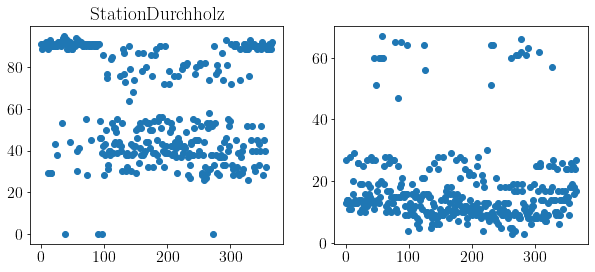

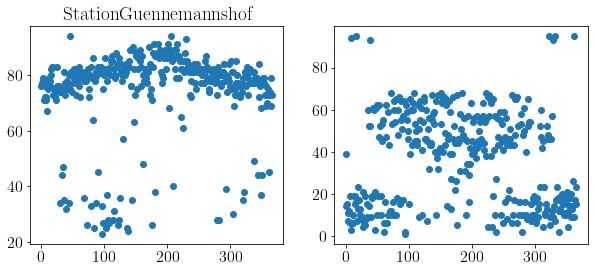

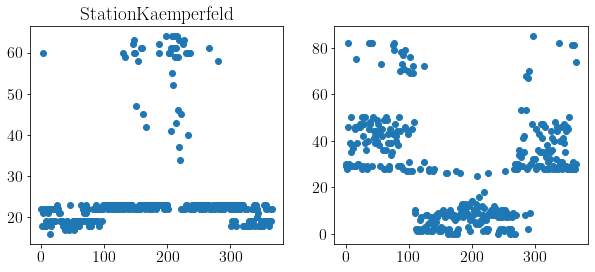

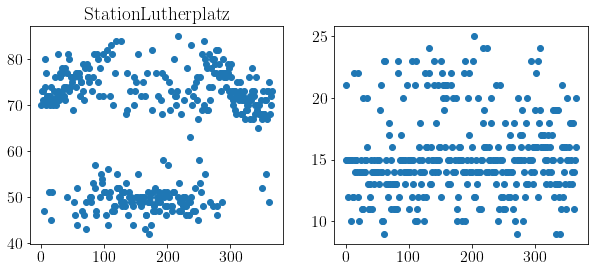

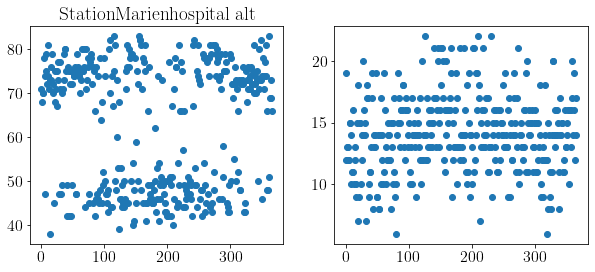

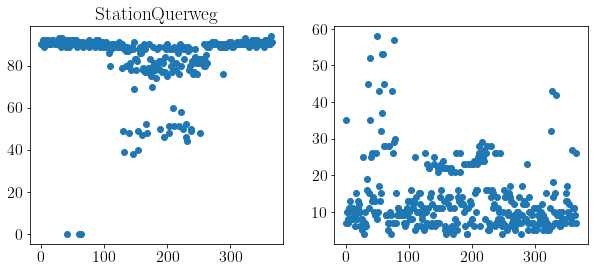

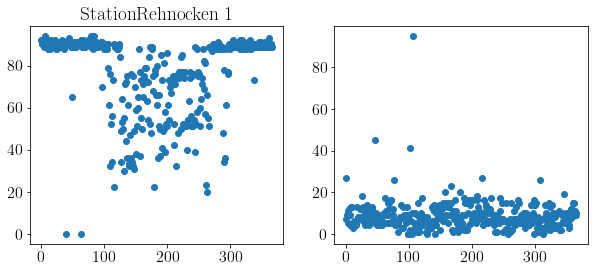

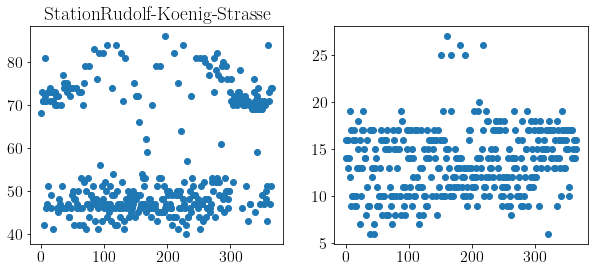

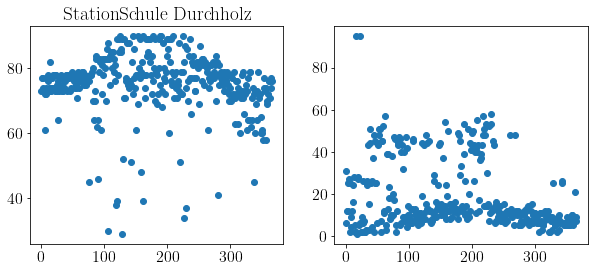

In [ ]:
for j in range(0,9):
    maxes=np.zeros(365)
    mines=np.zeros(365)
    for i in range(0,365):
        maxes[i]=np.argmax(all_powers_year[j][2018].to_numpy()[:,i])
        mines[i]=np.argmin(all_powers_year[j][2018].to_numpy()[:,i])
    subfig, axs=plt.subplots(1,2,figsize=(10,4))
    axs[0].set_title('Station' + stationen['Name'].iloc[j])
    axs[0].scatter(np.linspace(0,366,365),maxes)
    axs[1].scatter(np.linspace(0,366,365),mines)

In [ ]:
for i in range(0,9):
    df=all_powers_year[i][2018]
    data=df.to_numpy()
    plt.figure()
    sns.heatmap(data.T,cbar_kws={'label': 'Leistung [kW]'}).set(title='Station ' + stationen.loc[:,'Label'].iloc[i])
    plt.xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
    plt.xlabel('Zeit am Tag [h]')
    plt.ylabel('Tag im Jahr')
    if i == 0:
        plt.savefig('Heatmap_A.pdf',bbox_inches='tight')
    if i == 3:
        plt.savefig('Heatmap_D.pdf',bbox_inches='tight')

    if i == 3:
        plt.savefig('Heatmap_D.pdf',bbox_inches='tight')


In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

In [ ]:
#k-Means vs. Hierarchisches Clustern

n_cluster=4
for season in range(0,3):
    for day in range(0,3):
        df_to_cluster=np.zeros([96,9])
        for i in range(0,9):
            df_to_cluster[:,i]=all_mat_powers[i][season,day].mean(axis=1).to_numpy()
        dist_mat=np.zeros([9,9])
        df_to_cluster=df_to_cluster.T
        mymodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
        mymodel=mymodel.fit(df_to_cluster)

        kmeans_model = KMeans(n_clusters=n_cluster,random_state=0)
        kmeans_model_res = kmeans_model.fit(df_to_cluster)

        plt.figure()
        plt.title('Jahreszeit ' + str(season) + ', Tag ' + str(day))
        plot_dendrogram(mymodel,truncate_mode="level", p=5)

In [ ]:
#k-Means vs. Hierarchisches Clustern

n_cluster=4
for season in range(0,3):
    for day in range(0,3):
        df_to_cluster=np.zeros([96,9])
        for i in range(0,9):
            df_to_cluster[:,i]=all_mat_powers[i][season,day].mean(axis=1).to_numpy()
        dist_mat=np.zeros([9,9])
        df_to_cluster=df_to_cluster.T
        mymodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
        mymodel=mymodel.fit(df_to_cluster)

        kmeans_model = KMeans(n_clusters=n_cluster,random_state=0)
        kmeans_model_res = kmeans_model.fit(df_to_cluster)

        plt.figure()
        plt.title('Jahreszeit ' + str(season) + ', Tag ' + str(day))
        plot_dendrogram(mymodel,truncate_mode="level", p=5)

In [ ]:
def mahalanobis_distance(x,y,invC):
    return np.sqrt(np.dot(x.T,np.dot(invC,y)))

In [ ]:
C=np.cov(all_powers_year[3][2018].to_numpy())
Cinv=np.linalg.inv(C)
x=all_powers_year[3][2018].iloc[:,154].to_numpy()
y=all_powers_year[3][2018].iloc[:,155].to_numpy()
#y=all_powers_year[2][2018].iloc[:,120].to_numpy()
#z=300-all_powers_year[2][2018].iloc[:,15].to_numpy()
#z=all_powers_year[2][2018].iloc[:,65].to_numpy()
#z2=all_powers_year[2][2018].iloc[:,120].to_numpy()
z=all_powers_year[3][2018].iloc[:,15].to_numpy()
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
z=(z-z.min())/(z.max()-z.min())
#v=all_powers_year[2][2018].iloc[:,121].to_numpy()
#print(mahalanobis_distance(x,z,Cinv))
#print(mahalanobis_distance(x,y,Cinv))
#print(mahalanobis_distance(x,z2,Cinv))
print(np.linalg.norm(x-z))
print(np.linalg.norm(x-y))
print(dtw.distance(x,z))
print(dtw.distance(x,y))

In [ ]:
subfig, axs = plt.subplots(1,2,figsize=(12.8,3))
axs[1].plot(x)
axs[1].plot(z)
axs[1].grid()
axs[1].legend(['x','z'])
axs[1].set_xlabel('Zeit [h]')
axs[1].set_xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
axs[1].set_ylabel('Normierte Leistung')
axs[0].plot(x)
axs[0].plot(y)
axs[0].grid()
axs[0].legend(['x','y'])
axs[0].set_xlabel('Zeit [h]')
axs[0].set_xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
axs[0].set_ylabel('Normierte Leistung')
plt.savefig('DTW_Problem0.pdf',bbox_inches='tight')
plt.figure()
path = dtw.warping_path(x, y)
dtwvis.plot_warping(x, y, path)
plt.ylabel('Normierte Leistung')
plt.xlabel('Zeit [h]')
plt.xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
plt.savefig('DTW_Problem1.pdf',bbox_inches='tight')
plt.figure()
path = dtw.warping_path(x, z)
dtwvis.plot_warping(x, z, path)
plt.ylabel('Normierte Leistung')
plt.xlabel('Zeit [h]')
plt.xticks(np.arange(0,108, step=12),np.arange(0,25, step=3))
plt.savefig('DTW_Problem2.pdf',bbox_inches='tight')